## Profil
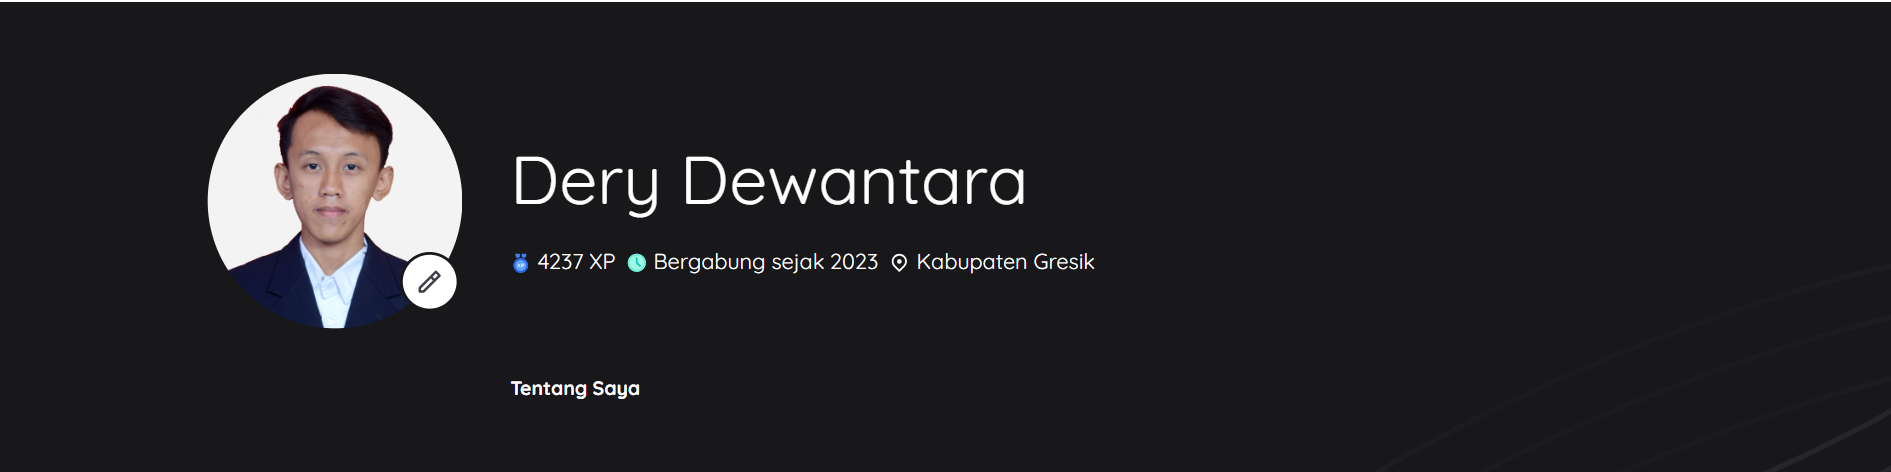

Link Profile: https://www.dicoding.com/users/derydtra/academies

## Kriteria Submission


1. Project merupakan hasil pekerjaan sendiri.

2. Project belum pernah digunakan untuk submission kelas Machine Learning di Dicoding dan belum pernah dipublikasikan di platform manapun.

3. Dataset yang dipakai merupakan data kuantitatif (minimum 500 sampel data).

4. Memberikan dokumentasi menggunakan text cell pada notebook (.ipynb) untuk menjelaskan setiap tahapan proyek.

5. Menentukan solusi permasalahan menggunakan pendekatan machine learning atau deep learning dengan memilih salah satu dari penyelesaian berikut:
Klasifikasi
Regresi
Clustering
Time series dan forecasting

6. Membuat draf laporan proyek machine learning yang menjelaskan alur proyek Anda dari mulai pemilihan domain permasalahan (problem domain), data understanding, data preparation, modeling, hingga tahap evaluasi. Ketentuan draf laporan proyek machine learning dapat Anda lihat pada sub modul berikutnya tentang Detail Laporan.

# Data Preparation

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:
# upload file kaggle.json yang di dapat dari akun kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"derydtr","key":"814c5c96c75c7ffee75b13a13d771936"}'}

In [3]:
# membuat directory dan mengubah izin file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Dataset link: https://www.kaggle.com/datasets/mohithsairamreddy/salary-data

In [4]:
!kaggle datasets download -d mohithsairamreddy/salary-data

  0% 0.00/16.6k [00:00<?, ?B/s]
100% 16.6k/16.6k [00:00<00:00, 31.1MB/s]


In [5]:
# unzip dan lihat list dataset
!mkdir /content/data
!unzip /content/salary-data.zip -d /content/data

Archive:  /content/salary-data.zip
  inflating: /content/data/Salary_Data.csv  


In [6]:
#import library
import numpy as np
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# import data csv dataset ke variabel
df = pd.read_csv(r'/content/data/Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [8]:
# total data
df.shape

(6704, 6)

In [9]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [10]:
# null check
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [11]:
# menghilangkan baris dimana terdapat data yang kosong
df.dropna(subset=['Age','Gender','Education Level','Job Title','Years of Experience','Salary'], inplace=True)

In [12]:
# null check
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

Dari langkah ini data telah siap diolah, tidak ada baris dengan data/kolom yang kosong

# Data Understanding

In [13]:
# Fitur Gender tidak mempengaruhi salary sehingga akan didrop
df = df.drop(['Gender'], axis = 'columns')

## Univariate Analysis

In [14]:
df.groupby('Age')['Age'].agg('count')

Age
21.0     18
22.0     15
23.0    104
24.0    240
25.0    284
26.0    393
27.0    516
28.0    429
29.0    444
30.0    449
31.0    364
32.0    351
33.0    398
34.0    309
35.0    200
36.0    281
37.0    156
38.0    149
39.0    158
40.0     92
41.0    129
42.0    176
43.0    158
44.0    126
45.0    144
46.0    102
47.0     47
48.0     98
49.0     91
50.0     88
51.0     30
52.0     29
53.0      7
54.0     68
55.0     16
56.0     11
57.0      9
58.0      7
60.0      5
61.0      2
62.0      5
Name: Age, dtype: int64

In [15]:
df.groupby('Education Level')['Education Level'].agg('count')

Education Level
Bachelor's            756
Bachelor's Degree    2265
High School           448
Master's              288
Master's Degree      1572
PhD                  1368
phD                     1
Name: Education Level, dtype: int64

In [16]:
# Fitur Education Level (phD) hanya terdapat 1 sample sehingga sample tersebut akan dihapus
df.drop(df.index[df['Education Level'] == 'phD'], inplace = True)

In [17]:
df.groupby('Job Title')['Job Title'].agg('count')

Job Title
Account Manager               1
Accountant                    1
Administrative Assistant      2
Back end Developer          244
Business Analyst              2
                           ... 
UX Designer                   1
UX Researcher                 1
VP of Finance                 1
VP of Operations              1
Web Developer                87
Name: Job Title, Length: 191, dtype: int64

In [18]:
# Fitur Job Title memiliki banyak sekali nilai unique sehingga akan di drop
df = df.drop(['Job Title'], axis = 'columns')

In [19]:
df.groupby('Years of Experience')['Years of Experience'].agg('count')

Years of Experience
0.0     120
0.5       1
1.0     540
1.5      12
2.0     610
3.0     602
4.0     522
5.0     399
6.0     438
7.0     351
8.0     425
9.0     380
10.0    192
11.0    320
12.0    294
13.0    209
14.0    253
15.0    129
16.0    242
17.0    106
18.0    126
19.0    121
20.0     61
21.0     42
22.0     47
23.0     37
24.0     19
25.0     24
26.0      7
27.0     11
28.0     16
29.0     12
30.0      6
31.0      5
32.0     10
33.0      6
34.0      2
Name: Years of Experience, dtype: int64

In [20]:
df.groupby('Salary')['Salary'].agg('count')

Salary
350.0         1
500.0         1
550.0         1
579.0         1
25000.0     133
           ... 
220000.0     11
225000.0      8
228000.0      1
240000.0      8
250000.0      3
Name: Salary, Length: 444, dtype: int64

In [21]:
df.head()

,Age,Education Level,Years of Experience,Salary
0,32.0,Bachelor's,5.0,90000.0
1,28.0,Master's,3.0,65000.0
2,45.0,PhD,15.0,150000.0
3,36.0,Bachelor's,7.0,60000.0
4,52.0,Master's,20.0,200000.0


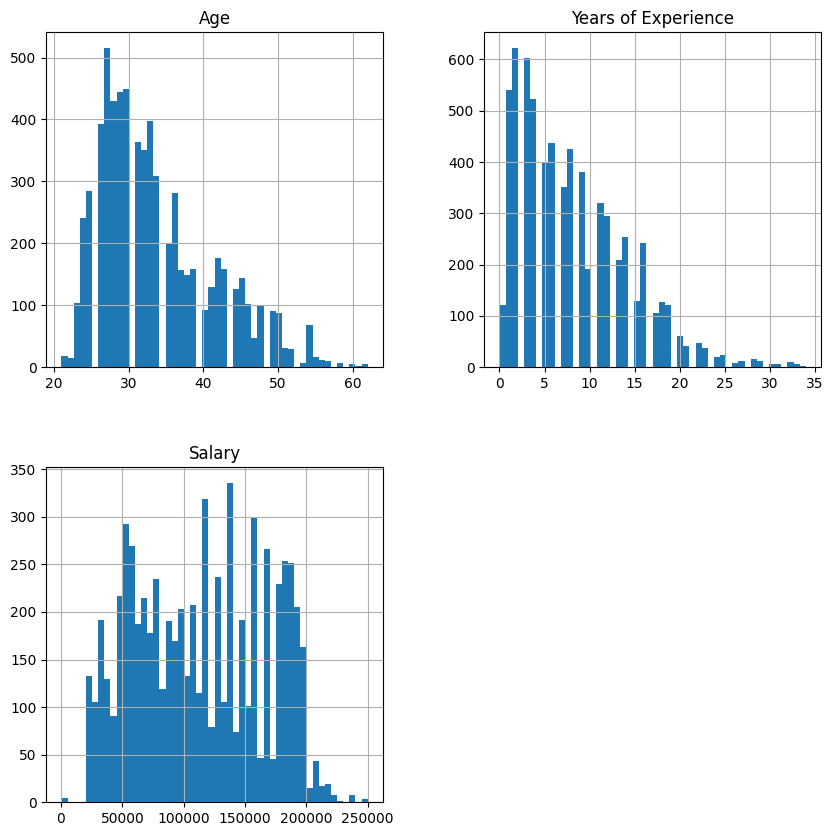

In [22]:
df.hist(bins=50, figsize=(10,10))
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [23]:
df.Salary.describe().apply(lambda x: format(x, 'f'))

count      6697.000000
mean     115328.555622
std       52793.703389
min         350.000000
25%       70000.000000
50%      115000.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: object

## Multivariate Analysis

In [24]:
df.head()

,Age,Education Level,Years of Experience,Salary
0,32.0,Bachelor's,5.0,90000.0
1,28.0,Master's,3.0,65000.0
2,45.0,PhD,15.0,150000.0
3,36.0,Bachelor's,7.0,60000.0
4,52.0,Master's,20.0,200000.0


<ipython-input-25-27d192dcb4a4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

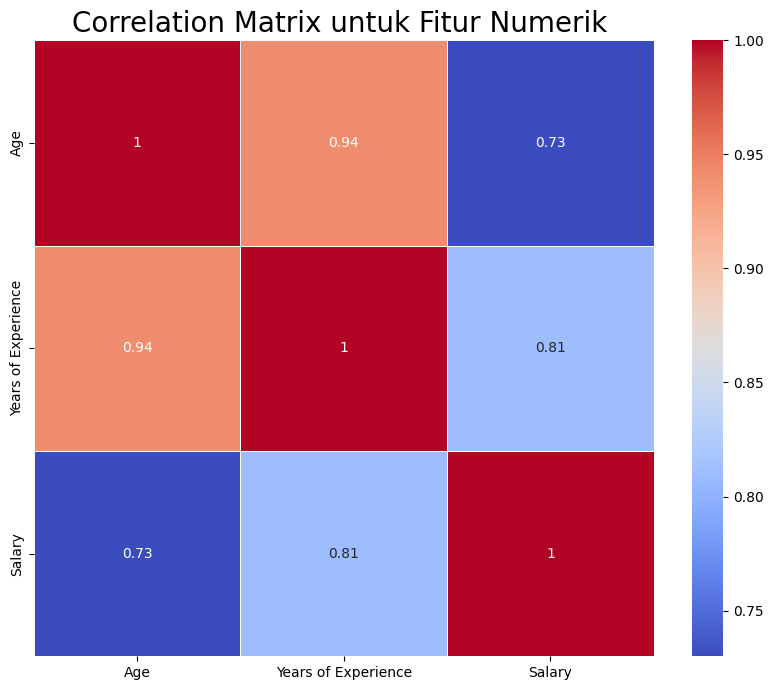

In [25]:
# Melihat kolerasi antara fitur numerik dengan fitur target (Salary)
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

<ipython-input-26-7deb85244686>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="Salary", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")


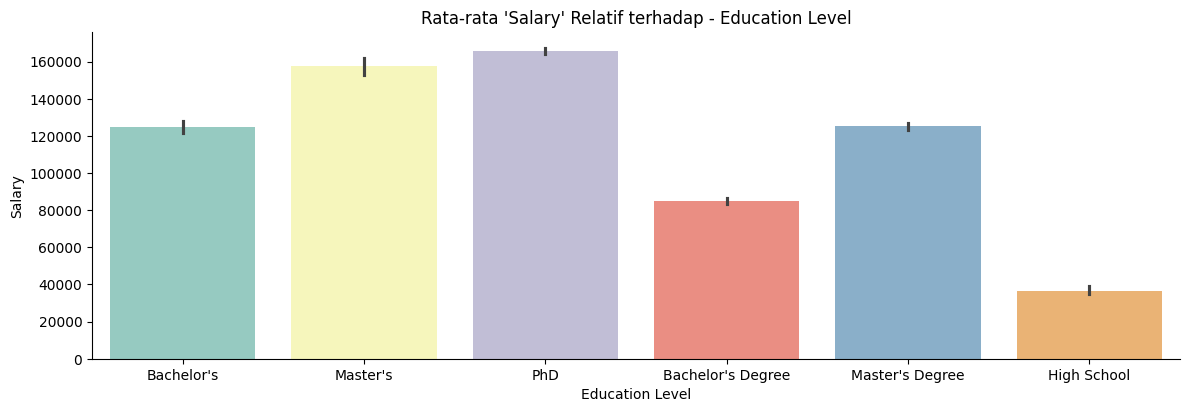

In [26]:
# Melihat kolerasi antara fitur kategorik dengan fitur target (Salary)
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Salary", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'Salary' Relatif terhadap - {}".format(col))

# Data Preparation

## One hot encoding

In [27]:
df = pd.get_dummies(data =  df, columns = ['Education Level'])

In [28]:
df

,Age,Years of Experience,Salary,Education Level_Bachelor's,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD
0,32.0,5.0,90000.0,1,0,0,0,0,0
1,28.0,3.0,65000.0,0,0,0,1,0,0
2,45.0,15.0,150000.0,0,0,0,0,0,1
3,36.0,7.0,60000.0,1,0,0,0,0,0
4,52.0,20.0,200000.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
6699,49.0,20.0,200000.0,0,0,0,0,0,1
6700,32.0,3.0,50000.0,0,0,1,0,0,0
6701,30.0,4.0,55000.0,0,1,0,0,0,0
6702,46.0,14.0,140000.0,0,0,0,0,1,0


## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop(["Salary"],axis =1)
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=123)

In [30]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 6697
Total # of sample in train dataset: 6027
Total # of sample in test dataset: 670


# Modeling

## Grid Search

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def grid_search_model(X,y):
    algos = {
        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            }
        },
        'boosting': {
            'model': AdaBoostRegressor(),
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'n_estimators': [25, 50, 75, 100],
                'random_state': [11, 33, 55, 77]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [25, 50, 75, 100],
                'max_depth' : [8, 16, 32, 64],
                'random_state': [11, 33, 55, 77],
            }
        }

    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.10, random_state=123)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

grid_search_model(X,y)

,model,best_score,best_params
0,knn,0.928416,{'n_neighbors': 6}
1,boosting,0.799213,"{'learning_rate': 0.1, 'n_estimators': 100, 'r..."
2,random_forest,0.941384,"{'max_depth': 32, 'n_estimators': 25, 'random_..."


## Model with best parameter

In [33]:
acc = pd.DataFrame(index=['accuracy'])

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(X_train, y_train)
acc.loc['accuracy', 'knn'] = knn.score(X_test,y_test)
knn.score(X_test,y_test)

0.9409799960047144

In [36]:
rf = RandomForestRegressor(n_estimators = 50, max_depth = 8, random_state = 11)
rf.fit(X_train, y_train)
acc.loc['accuracy', 'rf'] = rf.score(X_test,y_test)
rf.score(X_test,y_test)

0.9384396432937524

In [37]:
boosting = AdaBoostRegressor(n_estimators = 25, learning_rate = 0.001, random_state = 11)
boosting.fit(X_train, y_train)
acc.loc['accuracy', 'boosting'] = boosting.score(X_test,y_test)
boosting.score(X_test,y_test)

0.7758940898745246

# Evaluation

In [38]:
# Akurasi dari model
acc

,knn,rf,boosting
accuracy,0.94098,0.93844,0.775894


In [39]:
# Mean squared error dari model
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,163359.76147,170182.931549
RF,176547.872985,177507.98479
Boosting,619603.572521,646204.64556


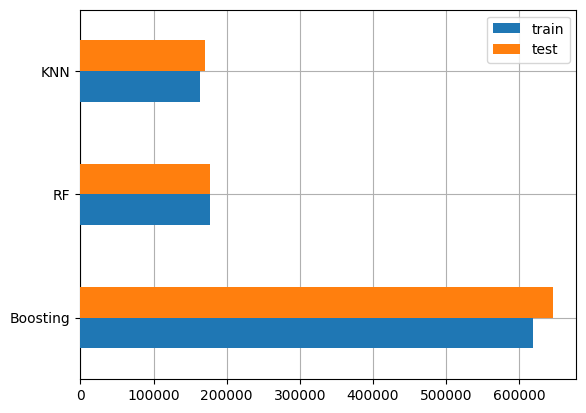

In [40]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [41]:
prediksi = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
4049,120000.0,128571.4,138564.2,155733.9
1366,110000.0,89350.3,80292.6,75418.9
3805,110000.0,135714.3,134764.5,132428.5
5793,200000.0,201428.6,203651.4,182878.5
5796,70000.0,77142.9,73539.8,75418.9
